- [什么是移动平均滤波](#什么是移动平均滤波)
- [一个简单的说明](#一个简单的说明)
- [Moving Average Filtering](#moving-average-filtering)


> 对于信号的滤波算法中，除了FFT和小波（wavelet）以外，还有其他一些常见的滤波算法可以对信号denoising。接下来的几个章节里，将逐一介绍这些滤波算法。而今天首先要介绍的就是，**移动平均滤波（Moving Average Filtering）**。
> 这是一种简单的滤波方法，通过计算一定窗口内一维信号的平均值来减小噪声的影响。移动平均滤波可以平滑信号，但对快速变化的信号可能响应较慢。


# 什么是移动平均滤波

除了FFT或Wavelet以外，对于一维信号，我们还可以使用类似移动平均滤波（Moving Average Filtering）实现denoising。**Moving Average Filtering** 是一种简单的信号滤波算法，用于减小信号中的噪声或去除高频成分，从而平滑信号。它基于对信号中一定窗口内数据的平均值进行计算。

它的基本原理如下：

给定一个包含 N 个样本的信号序列 $x[n]$，其中 n 是样本的索引（从 0 到 N-1）。移动平均滤波通过在信号序列上滑动一个固定长度为 M 的窗口，并计算窗口内样本的平均值来进行滤波。

对于滑动窗口的每个位置 k，滤波后的输出 y[k] 可以通过以下公式计算：

$$
y[k] = \frac{x[k] + x[k-1] + x[k-2] + ... + x[k-M+1]}{M} 
$$

其中，$x[k]$ 表示信号序列中索引为 $k$ 的样本值。公式中的 $1/M$ 是归一化因子，用于平均化窗口内的样本值。

移动平均滤波的核心思想是利用窗口内多个样本的平均值来代表当前样本的值，从而减小随机噪声或高频成分对信号的影响。滑动窗口的大小 M 决定了平滑的程度，较大的窗口可以更有效地平滑信号，但可能会导致滞后响应；较小的窗口可以更快地响应信号的变化，但平滑效果可能较差。

需要注意的是，移动平均滤波是一种**线性滤波方法**，主要适用于平稳信号或缓慢变化的信号。对于包含快速变化的信号或脉冲信号，移动平均滤波可能导致平滑效果不佳或信号失真。在实际应用中，根据具体的信号特性和需求，可以选择不同的滤波方法以获得更好的结果。

# 一个简单的说明

比方说，当我们有一个包含噪声的信号序列时，例如：

$$
x = [2, 4, 3, 7, 6, 5, 10, 8, 9, 12]
$$

我们可以使用移动平均滤波来平滑信号并减小噪声的影响。假设我们选择一个窗口大小为3，即每次计算三个样本的平均值。

第一个输出样本为：

$$
y[0] = (1/3) * (2 + 4 + 3) = 3
$$

第二个输出样本为：

$$
y[1] = (1/3) * (4 + 3 + 7) = 4.67
$$

以此类推，我们可以继续计算后续输出样本。如果你看过我之前的内容，或者有较好的数学背景，此刻大概能看出这其实就是卷积。

而卷机核函数，就是长度为N，元素值为 $\frac{1}{N}$。于是，我们可以很容易实现这样一个**Moving Average Filtering**的代码。

# Moving Average Filtering

看明白上面的内容后，下面的代码就不需要做过多解释

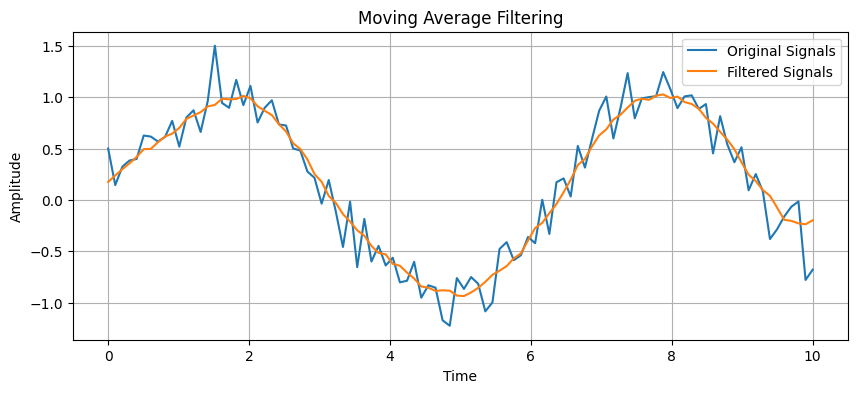

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average_filter(signal, window_size):
    window = np.ones(window_size) / window_size
    return np.convolve(signal, window, mode='same')

# 生成示例信号
t = np.linspace(0, 10, 100)  # 时间轴
signal = np.sin(t) + np.random.randn(100) * 0.2  # 添加噪声的正弦信号

# 进行移动平均滤波
filtered_signal = moving_average_filter(signal, window_size=10)

# 绘制原始信号和滤波后的信号
plt.figure(figsize=(10, 4))
plt.plot(t, signal, label='Original Signals')
plt.plot(t, filtered_signal, label='Filtered Signals')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Moving Average Filtering')
plt.legend()
plt.grid(True)
plt.show()